In [3]:
#find all files in the directory

import os
def getFiles(dirName):
    listOfFile = os.listdir(dirName)
    completeFileList = list()
    for file in listOfFile:
        completePath = os.path.join(dirName, file)
        if os.path.isdir(completePath):
            completeFileList = completeFileList + getFiles(completePath)
        elif 'json' in completePath:
            completeFileList.append(completePath.replace('\\', '/'))

    return completeFileList

allf = getFiles( "skills/")

In [4]:
#load all objects in the json files
import json
def loadObjects(jsonPath):
    lines = open(jsonPath, 'r').readlines() 
    allobj = []
    for line in lines: 
        if(len(line.strip()) > 0):
            allobj.append( json.loads(line) )
    return allobj

#NOTICE allo might contain repetitoins! (we filter them later)
allo = {}
for f in allf:
    allo[f] = loadObjects(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
#list all markets
for key,value in allo.items():
    print(key)
    print(len(value))


skills/skills/AU/fileNew.json
68244
skills/skills/AU/fileOld.json
59311
skills/skills/CA/fileNew.json
42429
skills/skills/CA/fileOld.json
156204
skills/skills/DE/fileNew.json
31880
skills/skills/DE/fileOld.json
57521
skills/skills/ES/fileNew.json
17623
skills/skills/ES/fileOld.json
60147
skills/skills/FR/fileNew.json
2575
skills/skills/FR/fileOld.json
30010
skills/skills/IN/fileNew.json
35657
skills/skills/IN/fileOld.json
92770
skills/skills/IT/fileNew.json
5271
skills/skills/IT/fileOld.json
45458
skills/skills/JP/fileNew.json
19448
skills/skills/JP/fileOld.json
78583
skills/skills/MX/fileNew.json
2308
skills/skills/MX/fileOld.json
26438
skills/skills/UK/fileNew.json
132316
skills/skills/UK/fileOld.json
159644
skills/skills/US/fileNew.json
88638
skills/skills/US/fileOld.json
679526


In [8]:
#prepare the market analysis
import json
def _createSkillDict(oldd):
    '''
    example json obj
    {'Main Category': 'Business & Finance', 'SubCategory': 'Business & Finance', 'Sample_Invocation_Utterances': ["“'Alexa, Open Current Bitcoin'”", "“'Alexa, Ask Current Bitcoin for Prices'”", "“'Alexa, Ask Current Bitcoin what the price is'”"], 'Name': 'CurrentBitcoin', 'Developer': 'by Sarim Studios', 'Skill_permission': [], 'Account_linking': '', 'Review_Count': None, 'Rating': '', 'Total_customer_that_rate_the_skill': '0', 'Total_Customers_Reviews': 'No customer reviews', 'Cost': 'Free to Enable', 'In_skill_purchase': None, 'Skill_description': "Description\nAn 'easy to use' Alexa skill that will provide you with the latest price for a bitcoin. This skill uses BitStamp's latest prices, which are always up-to-date. All you have to do to begin using the skill is ask Alexa, Ask Current Bitcoin for Prices. Price is given in USD.", 'Skill_link': 'https://www.amazon.ca/Sarim-Studios-CurrentBitcoin/dp/B01N9SS2LI/ref=sr_1_635?dchild=1&fst=as%3Aoff&qid=1595709096&rnid=16286270011&s=alexa-skills&sr=1-635', 'privacy_policy and Terms_of_use specified': 'No privacy_policy and Terms_of_use specified'}
    '''
    newd = {}    
    for obj in oldd:
        if len(obj) == 0:
            continue
            
        name = ''
        if 'Name' in obj:
            name = obj['Name']
        else:
            continue
            #print('[!] No name found', obj)
            
        skill_id = ''
        if 'Skill_link' in obj:
            try:
                skill_url = obj['Skill_link']
                skill_id = re.search(r"\b[B]+[0-9]+(?:[A-Z0-9]+/)+", skill_url).group().replace('/','')
            except:
                pass
        else:
            continue
            #print('[!] No name found', obj)
            
        dev = ''
        if 'Developer' in obj:
            dev = obj['Developer']
        else:
            continue
            #print('[!] No dev found', obj)
        
        maincat = ''
        if 'Main Category' in obj:
            maincat = obj['Main Category']
            
        subcat = ''
        if 'SubCategory' in obj:
            subcat = obj['SubCategory']
        perm = obj['Skill_permission']
        linking = obj['Account_linking']
        policy = ''
        if 'privacy_policy' in obj:
            policy = obj['privacy_policy']
        newd[skill_id] = {'skill_id':skill_id, 'name': name, 'dev':dev, 'perm':perm, 'acc_linking':linking, 'policy':policy ,'cat':maincat, 'subcat':subcat}
        
    return newddef _createSkillDict(oldd):
    '''
    example json obj
    {'Main Category': 'Business & Finance', 'SubCategory': 'Business & Finance', 'Sample_Invocation_Utterances': ["“'Alexa, Open Current Bitcoin'”", "“'Alexa, Ask Current Bitcoin for Prices'”", "“'Alexa, Ask Current Bitcoin what the price is'”"], 'Name': 'CurrentBitcoin', 'Developer': 'by Sarim Studios', 'Skill_permission': [], 'Account_linking': '', 'Review_Count': None, 'Rating': '', 'Total_customer_that_rate_the_skill': '0', 'Total_Customers_Reviews': 'No customer reviews', 'Cost': 'Free to Enable', 'In_skill_purchase': None, 'Skill_description': "Description\nAn 'easy to use' Alexa skill that will provide you with the latest price for a bitcoin. This skill uses BitStamp's latest prices, which are always up-to-date. All you have to do to begin using the skill is ask Alexa, Ask Current Bitcoin for Prices. Price is given in USD.", 'Skill_link': 'https://www.amazon.ca/Sarim-Studios-CurrentBitcoin/dp/B01N9SS2LI/ref=sr_1_635?dchild=1&fst=as%3Aoff&qid=1595709096&rnid=16286270011&s=alexa-skills&sr=1-635', 'privacy_policy and Terms_of_use specified': 'No privacy_policy and Terms_of_use specified'}
    '''
    newd = {}    
    for obj in oldd:
        if len(obj) == 0:
            continue
            
        name = ''
        if 'Name' in obj:
            name = obj['Name']
        else:
            continue
            #print('[!] No name found', obj)
            
        dev = ''
        if 'Developer' in obj:
            dev = obj['Developer']
        else:
            continue
            #print('[!] No dev found', obj)
        
        maincat = ''
        if 'Main Category' in obj:
            maincat = obj['Main Category']
            
        subcat = ''
        if 'SubCategory' in obj:
            subcat = obj['SubCategory']
        perm = obj['Skill_permission']
        linking = obj['Account_linking']
        policy = ''
        if 'privacy_policy' in obj:
            policy = obj['privacy_policy']
        newd[skill_id] = {'name': name, 'dev':dev, 'perm':perm, 'acc_linking':linking, 'policy':policy ,'cat':maincat, 'subcat':subcat}
        
    return newd

def analyseMarket(oldd, newd, verbose = True):
    oldskillsdict = _createSkillDict(oldd)
    newskillsdict = _createSkillDict(newd)
    
    #oldskill and newskillcount, print this info here because we filtered skill repetitions 
    #in _createSkillDict (otherwise the numbers don't match, cause jsons contain repeated skills)
    if(verbose):
        print('\t old skills:', len(oldskillsdict.keys() ))
        print('\t new skills:', len(newskillsdict.keys() ))
    
    changedPermissions = []
    newSkills = []
    removedSkills = []
    stillExistingSkills = []
    
    #new skills
    for skname in newskillsdict.keys():
        if skname not in oldskillsdict:
            newSkills.append( newskillsdict[skname] )
            
    #removed skills
    for skname in oldskillsdict.keys():
        if skname not in newskillsdict:
            removedSkills.append( oldskillsdict[skname] )
    
    #still existing skills
    for skname in oldskillsdict.keys():
        if skname in newskillsdict:
            stillExistingSkills.append( oldskillsdict[skname] )
    
    #chengedPermissions
    for skill in stillExistingSkills:
        skname = skill['name']
        dev = skill['dev']
        old_permissions = oldskillsdict[skill_id]['perm']
        new_permissions = newskillsdict[skill_id]['perm']
        all_permissions = list(set(old_permissions + new_permissions))
        
        if(len(all_permissions) != len(old_permissions)):
            auxo = skill
            auxo['perm_new'] = new_permissions
            changedPermissions.append( auxo )
            
    return {'newSkills':newSkills, 'removedSkills':removedSkills, 'stillExistingSkills':stillExistingSkills, 'changedPermissionsSkills':changedPermissions}

In [9]:
#
# Summary per market
#
def aggregateByProperty(skillsL, prop):
    '''
    agrgegate categories of the skills in skillsL, using property prop of the object
    '''
    catdict = {}
    for sk in skillsL:
        cat = sk[prop]
        if cat in catdict:
            catdict[cat] += 1
        else:
            catdict[cat] = 1
    lcat = [(k,v) for k,v in catdict.items()]        
    lcat = sorted(lcat, key=lambda x: x[1], reverse=True)
    return lcat

def aggregateNewPermissionsAdded(changedPermissionsSkillsL):
    '''
    permissions that are used in the new skills but not in their old versions -- permissions added
    '''
    newpermdict = {}
    for sk in changedPermissionsSkillsL:
        oldperm = sk['perm']
        newperm = sk['perm_new']
        uniquenewperm = list(set(newperm) - set(oldperm))
        for perm in uniquenewperm:
            if perm in newpermdict:
                newpermdict[perm] += 1
            else:
                newpermdict[perm] = 1
    lcat = [(k,v) for k,v in newpermdict.items()]        
    lcat = sorted(lcat, key=lambda x: x[1], reverse=True)
    return lcat
    
def aggregateNewPermissionsRemoved(changedPermissionsSkillsL):
    '''
    permissions that were used in old skills but not in the new versions of them -- permissions removed
    '''
    newpermdict = {}
    for sk in changedPermissionsSkillsL:
        oldperm = sk['perm']
        newperm = sk['perm_new']
        uniquenewperm = list(set(oldperm) - set(newperm))
        for perm in uniquenewperm:
            if perm in newpermdict:
                newpermdict[perm] += 1
            else:
                newpermdict[perm] = 1
    lcat = [(k,v) for k,v in newpermdict.items()]        
    lcat = sorted(lcat, key=lambda x: x[1], reverse=True)
    return lcat

#SUMMARY
for i in range( int(len(allf)/2) ):
    print()
    print('********************')
    market_name = allf[i*2][14:16] 
    print('Exploring market ', market_name)
    oldf = allf[(i*2)+1]
    oldd = allo[oldf]
    newf = allf[(i*2)]
    newd = allo[newf]
    print('old file:', oldf)    
    print('new file:', newf)    
    
    r = analyseMarket(oldd, newd)
    print()
    print('->newSkills', len(r['newSkills']) )
    #print('\tCATEGORIES\n\t', aggregateByProperty(r['newSkills'], 'cat') )
    #print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['newSkills'], 'subcat') )

    print('->removedSkills', len(r['removedSkills']) )
    #print('\tCATEGORIES\n\t', aggregateByProperty(r['removedSkills'], 'cat') )
    #print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['removedSkills'], 'subcat') )
    
    print('->stillExistingSkills', len(r['stillExistingSkills']) )
    #print('\tCATEGORIES\n\t', aggregateByProperty(r['stillExistingSkills'], 'cat') )
    #print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['stillExistingSkills'], 'subcat') )
    
    print('->changedPermissionsSkills', len(r['changedPermissionsSkills']) )
    #print('\tCATEGORIES\n\t', aggregateByProperty(r['changedPermissionsSkills'], 'cat') )
    #print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['changedPermissionsSkills'], 'subcat') )
    #print('\tADDED PERMISSIONS\n\t', aggregateNewPermissionsAdded(r['changedPermissionsSkills']) )
    #print('\tREMOVED PERMISSIONS\n\t', aggregateNewPermissionsRemoved(r['changedPermissionsSkills']) )
   
    #save analysis in out json
    path = 'out/'+market_name+'.json'
    with open(path, 'w') as json_file:
        print('Saving json in ',path)
        json.dump(r, json_file)


********************
Exploring market  AU
old file: skills/skills/AU/fileOld.json
new file: skills/skills/AU/fileNew.json
	 old skills: 23123
	 new skills: 24062

->newSkills 3723
->removedSkills 2784
->stillExistingSkills 20339
->changedPermissionsSkills 69
Saving json in  out/AU.json

********************
Exploring market  CA
old file: skills/skills/CA/fileOld.json
new file: skills/skills/CA/fileNew.json
	 old skills: 24700
	 new skills: 26009

->newSkills 3974
->removedSkills 2665
->stillExistingSkills 22035
->changedPermissionsSkills 71
Saving json in  out/CA.json

********************
Exploring market  DE
old file: skills/skills/DE/fileOld.json
new file: skills/skills/DE/fileNew.json
	 old skills: 8928
	 new skills: 9082

->newSkills 2197
->removedSkills 2043
->stillExistingSkills 6885
->changedPermissionsSkills 24
Saving json in  out/DE.json

********************
Exploring market  ES
old file: skills/skills/ES/fileOld.json
new file: skills/skills/ES/fileNew.json
	 old skills: 12

In [10]:
#DETAILS
for i in range( int(len(allf)/2) ):
    print()
    print('********************')
    print('Exploring market ', allf[i*2][14:16] )
    oldf = allf[(i*2)+1]
    oldd = allo[oldf]
    newf = allf[(i*2)]
    newd = allo[newf]
    print('old file:', oldf)    
    print('new file:', newf)    
    
    r = analyseMarket(oldd, newd)
    print()
    print('->newSkills', len(r['newSkills']) )
    print('\tCATEGORIES\n\t', aggregateByProperty(r['newSkills'], 'cat') )
    print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['newSkills'], 'subcat') )

    print('->removedSkills', len(r['removedSkills']) )
    print('\tCATEGORIES\n\t', aggregateByProperty(r['removedSkills'], 'cat') )
    print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['removedSkills'], 'subcat') )
    
    print('->stillExistingSkills', len(r['stillExistingSkills']) )
    print('\tCATEGORIES\n\t', aggregateByProperty(r['stillExistingSkills'], 'cat') )
    print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['stillExistingSkills'], 'subcat') )
    
    print('->changedPermissionsSkills', len(r['changedPermissionsSkills']) )
    print('\tCATEGORIES\n\t', aggregateByProperty(r['changedPermissionsSkills'], 'cat') )
    print('\tSUBCATEGORIES\n\t', aggregateByProperty(r['changedPermissionsSkills'], 'subcat') )
    print('\tADDED PERMISSIONS\n\t', aggregateNewPermissionsAdded(r['changedPermissionsSkills']) )
    print('\tREMOVED PERMISSIONS\n\t', aggregateNewPermissionsRemoved(r['changedPermissionsSkills']) )


********************
Exploring market  AU
old file: skills/skills/AU/fileOld.json
new file: skills/skills/AU/fileNew.json
	 old skills: 23123
	 new skills: 24062

->newSkills 3723
	CATEGORIES
	 [('Games & Trivia', 963), ('Music & Audio', 872), ('Smart Home', 362), ('Education & Reference', 362), ('Lifestyle', 245), ('Health & Fitness', 181), ('Kids', 138), ('News', 105), ('Business & Finance', 103), ('Novelty & Humour', 82), ('Social', 73), ('Productivity', 52), ('Fitness & Sports', 37), ('Food & Drink', 34), ('Weather', 28), ('Travel & Transportation', 27), ('Movies & TV', 22), ('Utilities', 18), ('Connected Car', 8), ('', 5), ('Shopping', 4), ('Local', 2)]
	SUBCATEGORIES
	 [('Music & Audio', 864), ('Knowledge & Trivia', 519), ('Education & Reference', 434), ('Games', 399), ('Smart Home', 362), ('Health & Fitness', 181), ('News', 124), ('Business & Finance', 103), ('Novelty & Humour', 94), ('Religion & Spirituality', 86), ('Lifestyle', 85), ('Accessories', 46), ('Productivity', 43), 

	 old skills: 8928
	 new skills: 9082

->newSkills 2197
	CATEGORIES
	 [('Music & Audio', 888), ('Smart Home', 243), ('Games & Trivia', 231), ('Education & Reference', 157), ('News', 122), ('Lifestyle', 103), ('Business & Finance', 70), ('Health & Fitness', 67), ('Novelty & Humour', 51), ('Food & Drink', 46), ('Travel & Transportation', 35), ('Productivity', 32), ('Shopping', 30), ('Sports', 30), ('Kids', 20), ('Social', 20), ('Utilities', 18), ('Movies & TV', 12), ('Weather', 12), ('Connected Car', 5), ('', 4), ('Local', 1)]
	SUBCATEGORIES
	 [('Streaming Services', 797), ('Smart Home', 243), ('Education & Reference', 164), ('News', 149), ('Games', 125), ('Knowledge & Trivia', 80), ('Business & Finance', 70), ('Podcasts', 69), ('Health & Fitness', 67), ('Novelty & Humour', 57), ('Shopping', 30), ('Organizers & Assistants', 28), ('Game Info & Accessories', 26), ('Home Services', 23), ('Religion & Spirituality', 22), ('Self Improvement', 22), ('Navigation & Trip Planners', 22), ('Cooking 

	 old skills: 20989
	 new skills: 29249

->newSkills 13019
	CATEGORIES
	 [('Games & Trivia', 4069), ('Education & Reference', 1980), ('Music & Audio', 1584), ('Lifestyle', 941), ('Novelty & Humour', 763), ('Smart Home', 487), ('Health & Fitness', 470), ('News', 456), ('Kids', 404), ('Business & Finance', 377), ('Food & Drink', 301), ('Social', 269), ('Travel & Transportation', 180), ('Productivity', 167), ('Sports', 149), ('Utilities', 141), ('Movies & TV', 112), ('Weather', 111), ('Shopping', 36), ('Local', 22)]
	SUBCATEGORIES
	 [('Knowledge & Trivia', 2292), ('Education & Reference', 2276), ('Games', 1557), ('Streaming Services', 1047), ('Novelty & Humour', 795), ('News', 545), ('Smart Home', 487), ('Health & Fitness', 470), ('Self Improvement', 402), ('Business & Finance', 377), ('Podcasts', 348), ('Religion & Spirituality', 303), ('Game Info & Accessories', 220), ('Cooking & Recipes', 193), ('Social', 153), ('Organizers & Assistants', 146), ('Accessories', 145), ('Weather', 111), (

	 old skills: 2679
	 new skills: 3519

->newSkills 1289
	CATEGORIES
	 [('ゲーム・トリビア', 367), ('ライフスタイル', 195), ('スマートホーム', 137), ('音楽・オーディオ', 97), ('ソーシャル', 82), ('教育・レファレンス', 67), ('ニュース', 65), ('ヘルス・フィットネス', 55), ('ビジネス・ファイナンス', 51), ('ユーティリティ', 42), ('子ども向け', 27), ('スポーツ', 24), ('フード・ドリンク', 20), ('旅行・交通', 20), ('仕事効率化', 9), ('天気', 7), ('コネクテッドカー', 7), ('ノベルティ・ユーモア', 6), ('映画・TV', 4), ('ショッピング', 3), ('', 2), ('地域', 2)]
	SUBCATEGORIES
	 [('ゲーム', 220), ('スマートホーム', 137), ('知識・トリビア', 136), ('ホームサービス', 133), ('ニュース', 88), ('ストリーミングサービス', 78), ('コミュニケーション', 73), ('教育・レファレンス', 67), ('ヘルス・フィットネス', 55), ('ビジネス・ファイナンス', 51), ('アラーム・時計', 21), ('自己啓発', 21), ('子ども向け教育・レファレンス', 18), ('占星術', 18), ('クッキング・レシピ', 16), ('イベント情報', 15), ('アクセサリ', 11), ('ゲーム情報・アクセサリ', 11), ('ナビゲーション・旅行プランナー', 8), ('計算機', 8), ('カレンダー・リマインダー', 8), ('オーガナイザー・アシスタント', 8), ('天気', 7), ('コネクテッドカー', 7), ('公共交通機関', 7), ('ノベルティ・ユーモア', 6), ('ポッドキャスト', 6), ('子ども向けノベルティ・ユーモア', 5), ('友人・家族', 4), ('宗教・スピリチュアル', 3), ('ファッション・スタイル', 3), ('ソー

	 old skills: 29094
	 new skills: 30975

->newSkills 6725
	CATEGORIES
	 [('', 2441), ('Streaming Services', 976), ('Knowledge & Trivia', 965), ('Games', 731), ('Podcasts', 189), ('Religion & Spirituality', 141), ('Education & Reference', 132), ('Self Improvement', 112), ('Game Info & Accessories', 103), ('News', 74), ('Organizers & Assistants', 73), ('Friends & Family', 73), ('Home Services', 69), ('Music & Audio', 68), ('Accessories', 61), ('Communication', 59), ('Pets & Animals', 56), ('Cooking & Recipes', 43), ('Novelty & Humour', 40), ('Navigation & Trip Planners', 38), ('Movie Info & Reviews', 28), ('Fashion & Style', 26), ('Event Finders', 20), ('Calendars & Reminders', 20), ('Public Transportation', 19), ('Music Info, Reviews & Recognition Services', 18), ('Astrology', 17), ('To-Do Lists & Notes', 16), ('Exercise & Workout', 15), ('Calculators', 14), ('Schools', 12), ('TV Guides', 11), ('Score Keeping', 11), ('Wine & Beverages', 11), ('Alarms & Clocks', 9), ('Social Networking',

# Explore skill distribution

In [11]:
from matplotlib import pyplot as plt

#create figure
def createFigure(listname, prop, title):
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
    fig.suptitle(title, y=1.03)
    fig.tight_layout()
    
    #market index
    print('Exploring', title)
    market = 0
    for row in ax:
        for col in row:
            if(market >= int(len(allf)/2)  ):
                break
            marketstr = allf[market*2][14:16]
            #print('Exploring market ', marketstr)

            oldf = allf[(market*2)+1]
            oldd = allo[oldf]
            newf = allf[(market*2)]
            newd = allo[newf]
            r = analyseMarket(oldd, newd, verbose=False)
            catdistr = aggregateByProperty(r[listname], prop)
            labels = [x[0] for x in catdistr][:10]
            counts = [x[1] for x in catdistr][:10]
            col.set_title(marketstr)
            col.bar(labels, counts)
            market +=1

    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)        


    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.5)
    plt.show()        

    
def createFigurePermissions(listname, title, modeAdded= True):
    '''
    the same as above function but chekcing on different functions
    '''
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
    fig.suptitle(title, y=1.03)
    fig.tight_layout()
    
    #market index
    print('Exploring', title)
    market = 0
    for row in ax:
        for col in row:
            if(market >= int(len(allf)/2)  ):
                break
            marketstr = allf[market*2][14:16]
            #print('Exploring market ', marketstr)

            oldf = allf[(market*2)+1]
            oldd = allo[oldf]
            newf = allf[(market*2)]
            newd = allo[newf]
            r = analyseMarket(oldd, newd, verbose=False)
            if(modeAdded):
                catdistr = aggregateNewPermissionsAdded(r[listname])
            else:
                catdistr = aggregateNewPermissionsRemoved(r[listname])
            labels = [x[0] for x in catdistr][:10]
            counts = [x[1] for x in catdistr][:10]
            col.set_title(marketstr)
            col.bar(labels, counts)
            market +=1

    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)        


    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.5)
    plt.show()  

Exploring Top 10 most frequent skill categories for newSkills per market


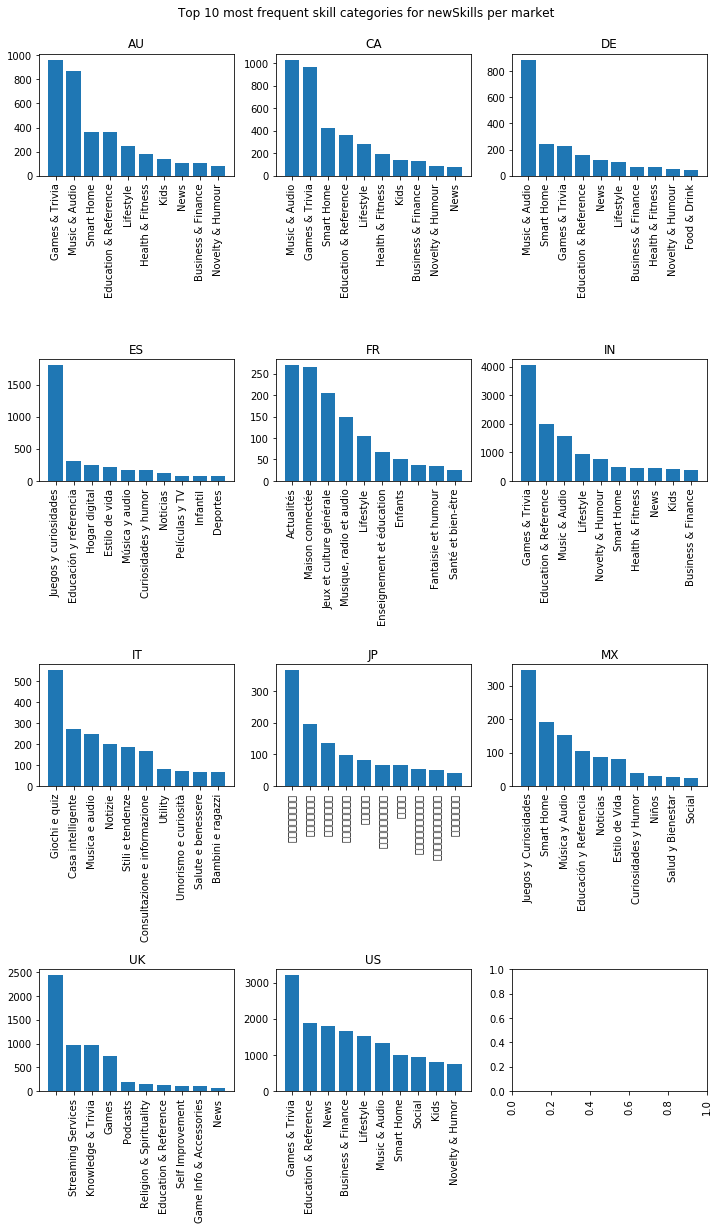

Exploring Top 10 most frequent skill sub-categories for newSkills per market


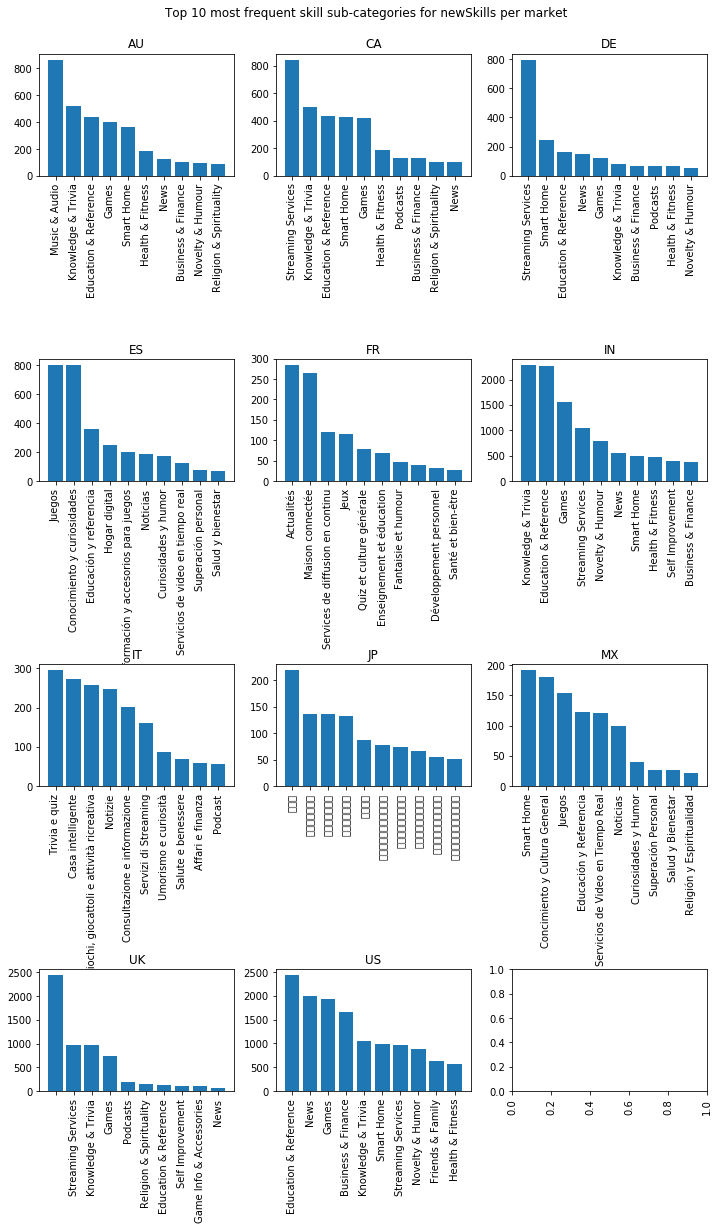

Exploring Top 10 most frequent skill categories for removedSkills per market


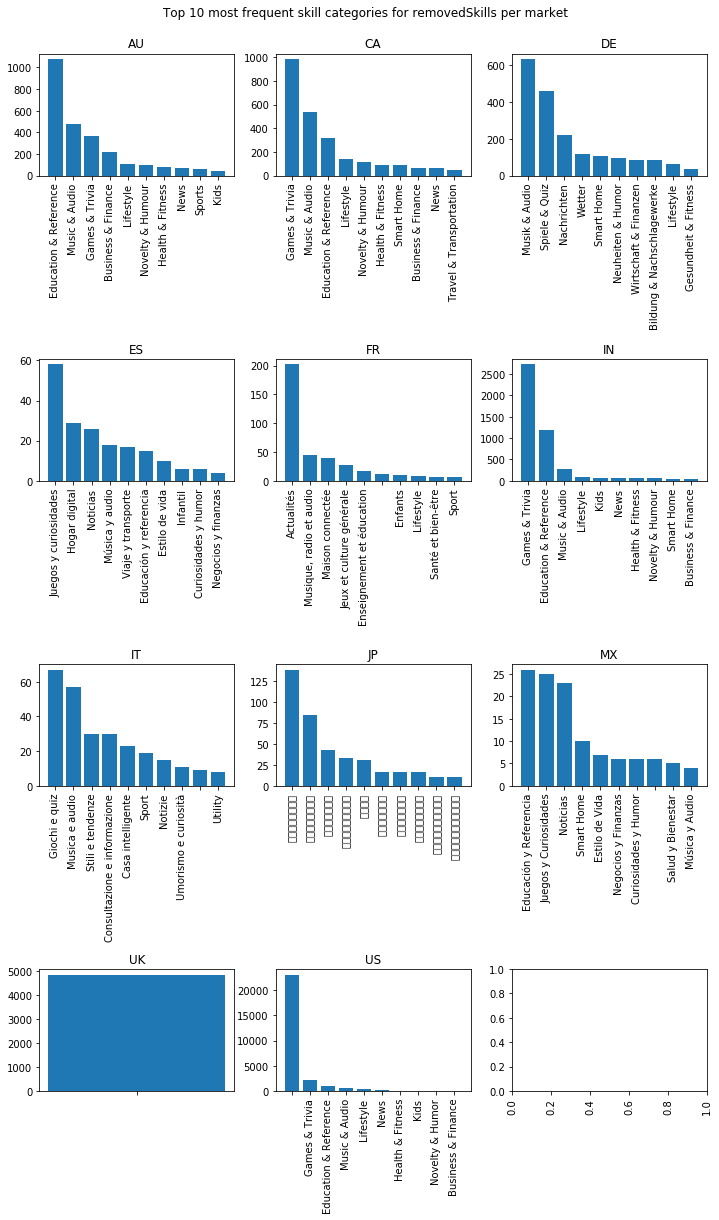

Exploring Top 10 most frequent skill sub-categories for removedSkills per market


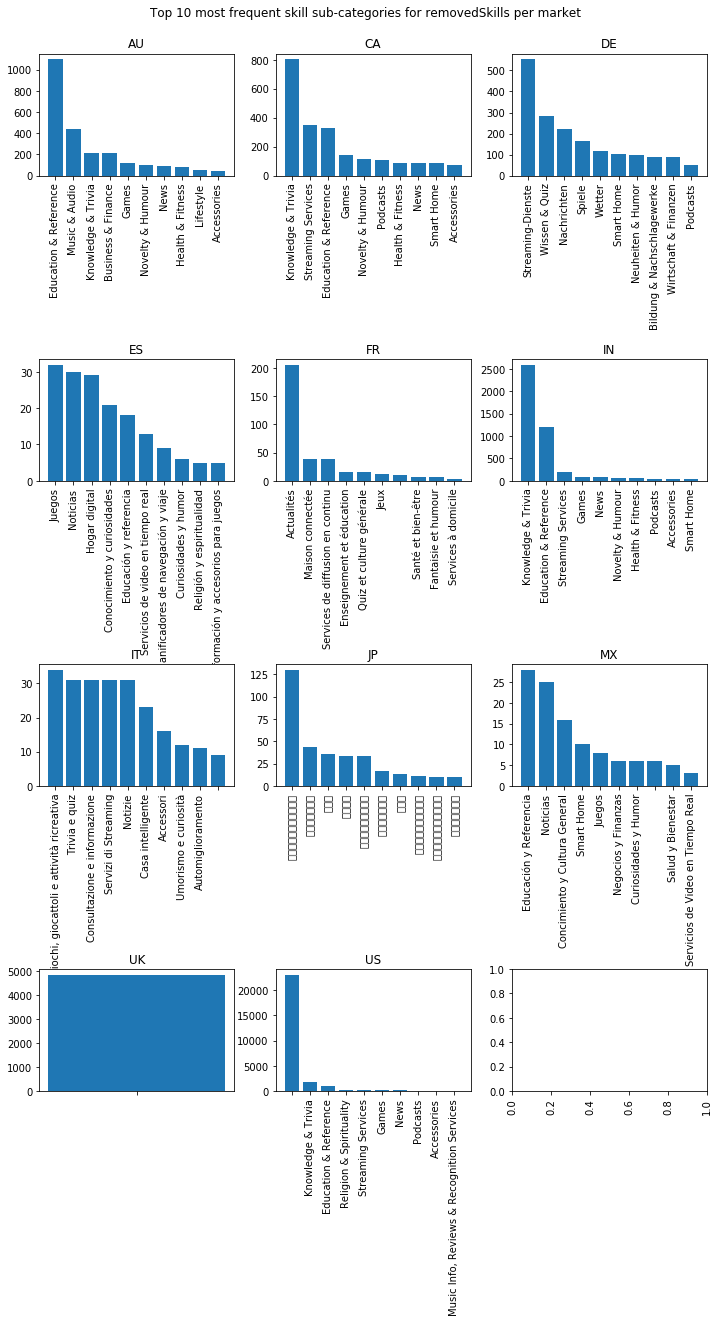

Exploring Top 10 most frequent skill categories for stillExistingSkills per market


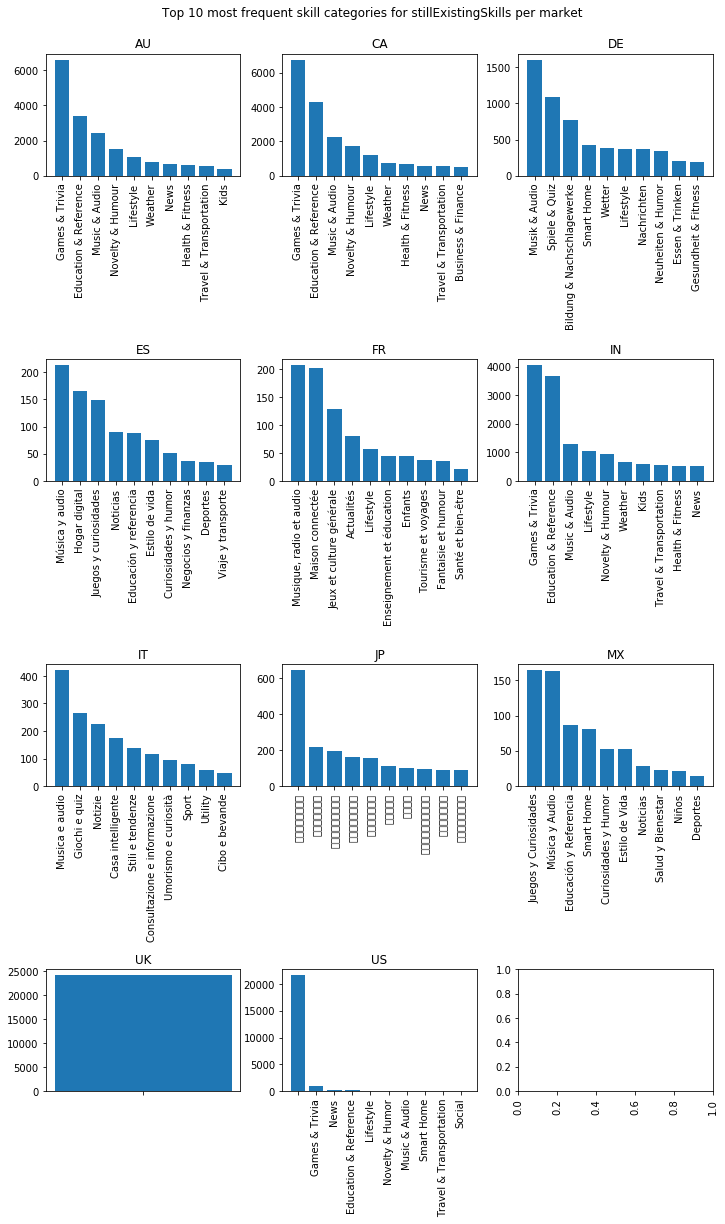

Exploring Top 10 most frequent skill sub-categories for stillExistingSkills per market


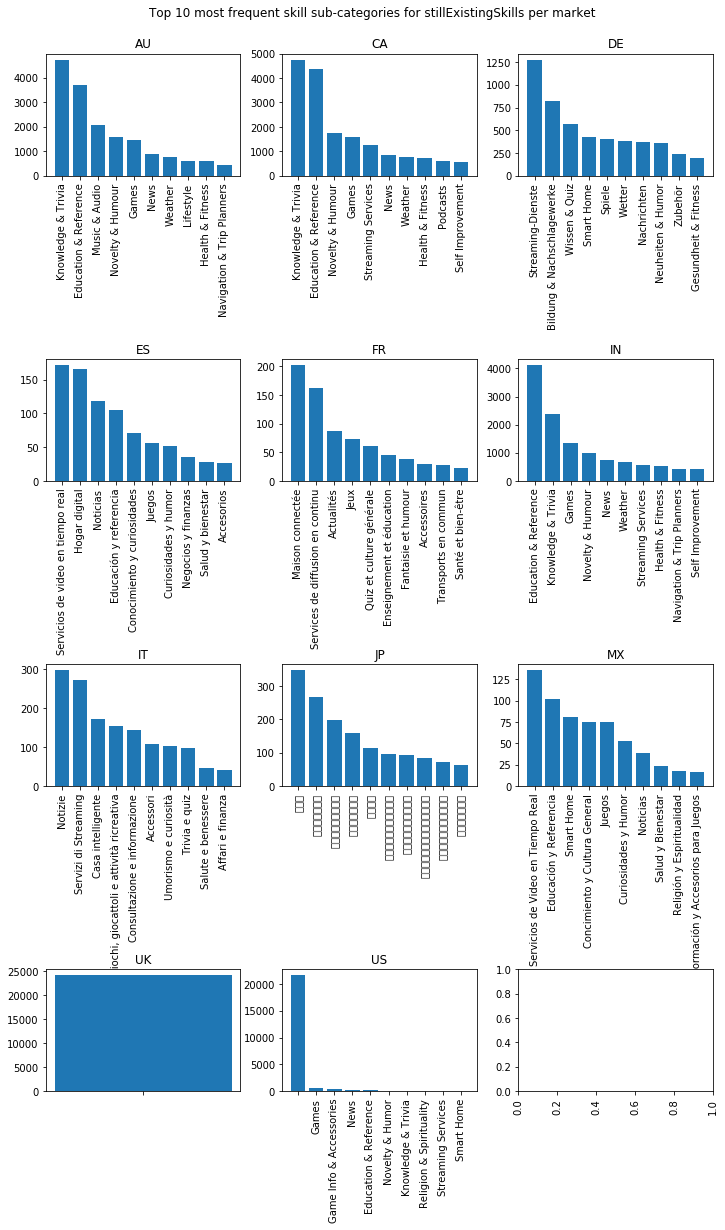

Exploring Top 10 most frequent skill categories for changedPermissionsSkills per market


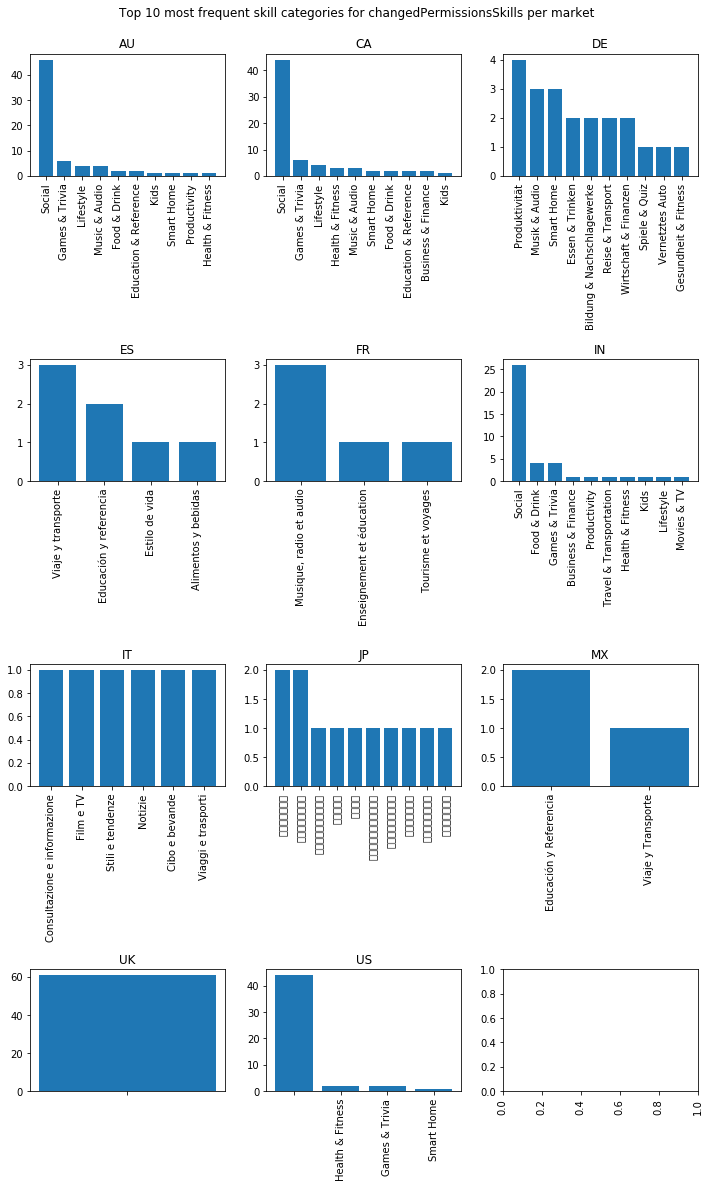

Exploring Top 10 most frequent skill sub-categories for changedPermissionsSkills per market


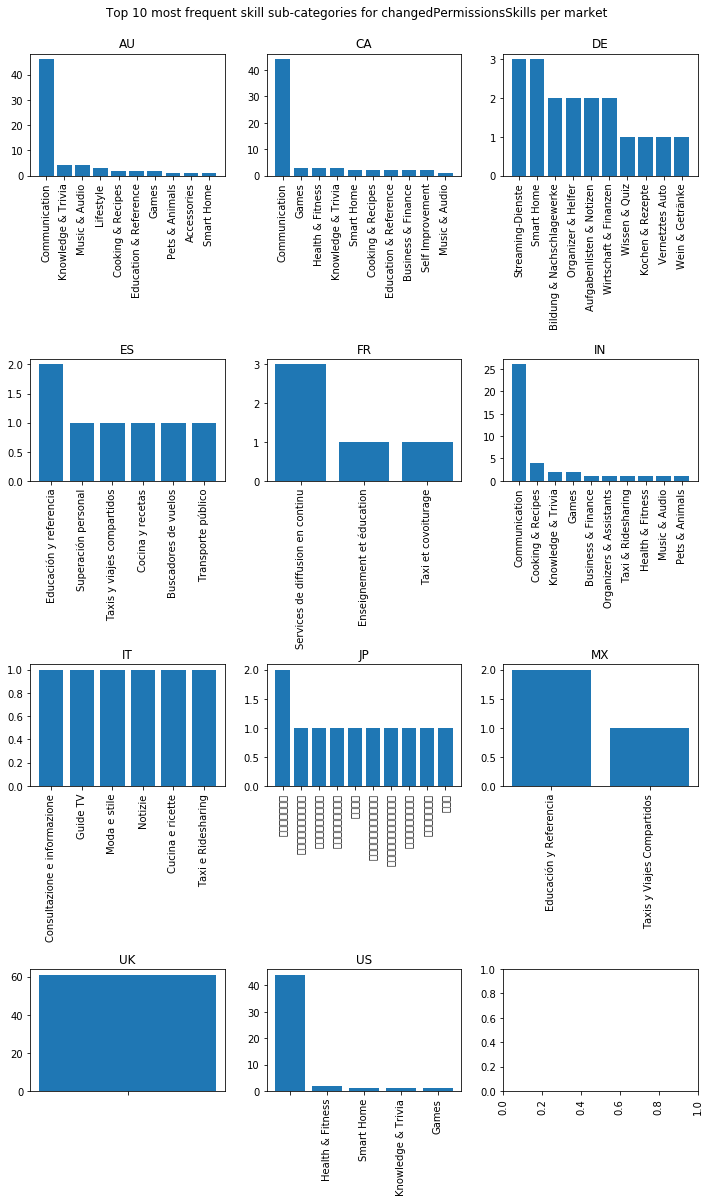

Exploring Top 10 most frequent skill newly added permissions per market


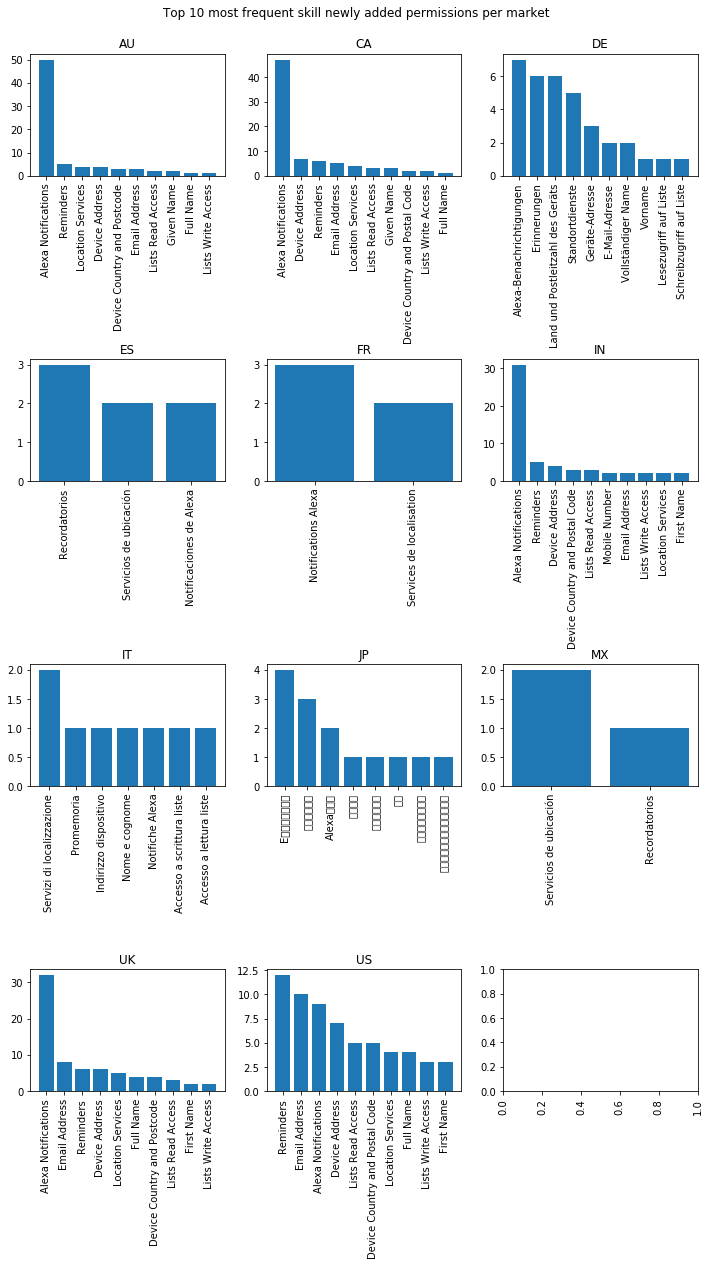

Exploring Top 10 most frequent skill removed permissions per market


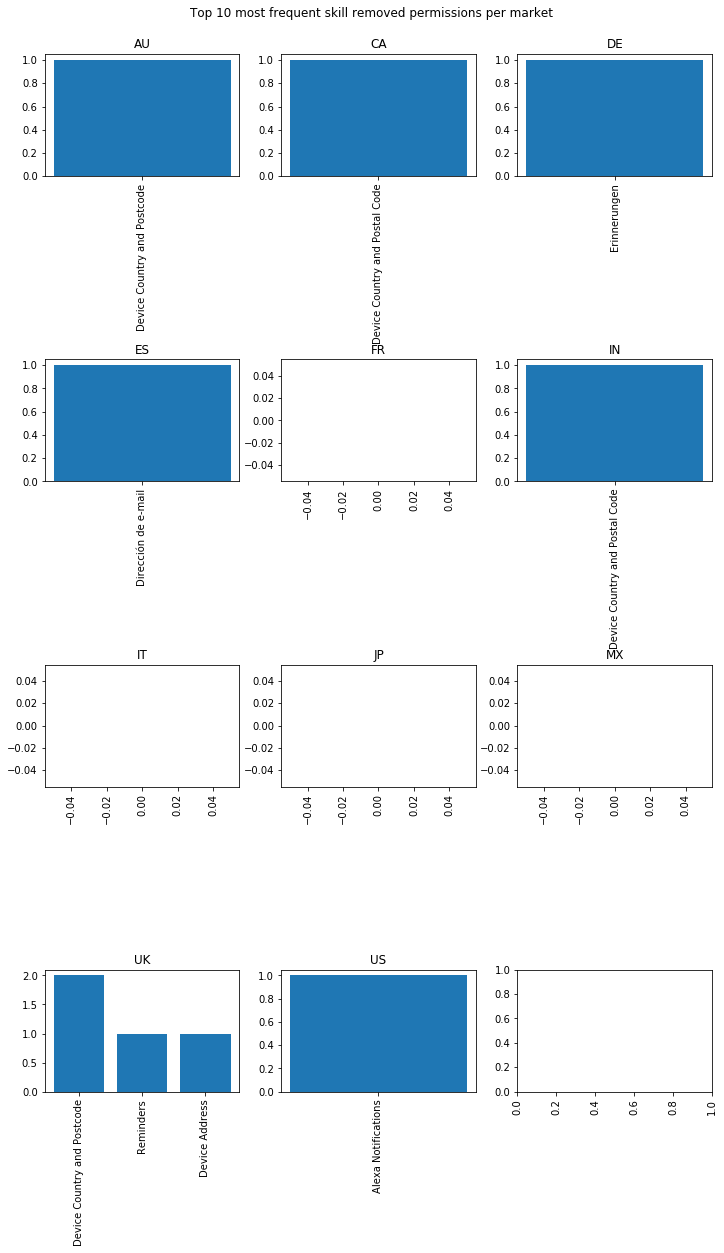

In [12]:
createFigure('newSkills', 'cat',  "Top 10 most frequent skill categories for newSkills per market")
createFigure('newSkills', 'subcat',  "Top 10 most frequent skill sub-categories for newSkills per market")

createFigure('removedSkills', 'cat',  "Top 10 most frequent skill categories for removedSkills per market")
createFigure('removedSkills', 'subcat',  "Top 10 most frequent skill sub-categories for removedSkills per market")

createFigure('stillExistingSkills', 'cat',  "Top 10 most frequent skill categories for stillExistingSkills per market")
createFigure('stillExistingSkills', 'subcat',  "Top 10 most frequent skill sub-categories for stillExistingSkills per market")

createFigure('changedPermissionsSkills', 'cat',  "Top 10 most frequent skill categories for changedPermissionsSkills per market")
createFigure('changedPermissionsSkills', 'subcat',  "Top 10 most frequent skill sub-categories for changedPermissionsSkills per market")
createFigurePermissions('changedPermissionsSkills', "Top 10 most frequent skill newly added permissions per market", True)
createFigurePermissions('changedPermissionsSkills', "Top 10 most frequent skill removed permissions per market", False)
